<a href="https://colab.research.google.com/github/SaiAnjesh/Xtern-Data-Science-Work-Prompt/blob/main/Data_Science_Work_Prompt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
  Author : Sai Anjesh
  Updated : 2023-10-16
"""

'\n  Author : Sai Anjesh\n  Updated : 2023-10-16\n'

In [2]:
!pip install overpy

In [3]:
!pip install geopy

In [4]:
import pandas as pd
import numpy as np
import overpy
from geopy.geocoders import Nominatim
import folium
geolocator = Nominatim(user_agent="reverse_geocoding_example")

## STEP 1
Utilize an open-source map API such as Google Map API, OpenStreetMap, AWS Map API to collect useful data on local food trucks. Clean and organize your data then present it as a table or data frame. Such table or data frame of local food trucks should contain basic information such as name, address, rating, website, open hour, and cuisine type. See Example_Data.csv for an example list.

In [5]:
class FoodTruckData():
  # # Private Members
  # Define the coordinates (latitude and longitude) for Indiana
  # we'll use coordinates that roughly cover the state.
  # Approximate coordinates of Indiana borders
  latitude_min = 37.5  # Example latitude for the southern border of Indiana
  latitude_max = 41.5  # Example latitude for the northern border of Indiana
  longitude_min = -88.0  # Example longitude for the western border of Indiana
  longitude_max = -84.5  # Example longitude for the eastern border of Indiana

  def __init__(self):
    print("Class : Food Truck Data")

  def get_min_lat(self):
    return self.latitude_min

  def get_max_lat(self):
    return self.latitude_max

  def get_min_lon(self):
    return self.longitude_min

  def get_max_lon(self):
    return self.longitude_max

  def create_dataset(self):
    #
    # Initialize the Overpass API object
    api = overpy.Overpass()

    # Define an Overpass QL query to search for food trucks in Indiana
    query = f"""
    (
      node["amenity"="food_court"]({self.latitude_min}, {self.longitude_min}, {self.latitude_max}, {self.longitude_max});
    );
    out;
    """

    # Perform the Overpass API query
    result = api.query(query)

    # Extract and organize data
    food_trucks = []
    address_tags = [
        'road',
        'city',
        'county',
        'state',
        'postcode',
        'country',
        ]
    # cnt = 0
    for node in result.nodes:
      # cnt += 1
      # print(cnt)
      # print("--------------------------------------------")
      name = node.tags.get("name", "N/A")
      rating = "N/A"
      website = node.tags.get("website", "N/A")
      open_hour = node.tags.get("opening_hours", "N/A")
      cuisine_type = "N/A"
      latitude = float(node.lat)
      longitude = float(node.lon)


      location = geolocator.reverse((latitude, longitude), exactly_one=True)
      address = ','.join((location.raw['display_name']).split(',')[1:])

      if(
          # True
          (location.raw['address']['state'] == "Indiana")
          and
           (location.raw['type'] == 'food_court')
           ):
        # print("<<<---added--->>>")
        food_trucks.append({
                  "Name": name,
                  "Address": address,
                  # "Rating": rating,
                  "Website": website,
                  "Open Hour": open_hour,
                  # "Cuisine Type": cuisine_type,
                  "Latitude": latitude,
                  "Longitude": longitude,
                  "Type": location.raw['type'],
                  "Place_Rank": location.raw['place_rank'],
                  "Importance":location.raw['importance'],
                  "State":location.raw['address']['state'],
                  "Post_Code":location.raw['address']['postcode'],
                  "Road":location.raw['address']['road'],
                  "County":location.raw['address']['county'],
                  })

    # Create a Pandas DataFrame from the collected data
    food_trucks_df = pd.DataFrame(food_trucks)

    return food_trucks_df

In [6]:
# Cleaning Data
# There is no food truck based information for the state of Indiana
# Hence only considering the food court for this problem statement
food_trucks_df_cleaned = FoodTruckData().create_dataset().copy()
food_trucks_df_cleaned = food_trucks_df_cleaned.loc[food_trucks_df_cleaned['State'] == "Indiana", :]
food_trucks_df_cleaned = food_trucks_df_cleaned.loc[food_trucks_df_cleaned['Type'] == 'food_court', :]
food_trucks_df_cleaned = food_trucks_df_cleaned.sort_values(by=['Post_Code'], ascending=True)

# Discardin thi column as it is not providing relevanct inpformation
if (food_trucks_df_cleaned["Open Hour"] == "N/A").all():
    food_trucks_df_cleaned = food_trucks_df_cleaned.drop("Open Hour", axis=1)

food_trucks_df_cleaned = food_trucks_df_cleaned.reset_index(drop=True)

Class : Food Truck Data


## Potential Porblems Statements:

- With proper API we can get the distance between multiple places
- We can alos get the reviews and ratings
- Based on these above points, we can build an ***optimization engine*** to plan a foddie trip. This can potentially help many students.
- We can employ linear or non linear modelling optimization algorithms

## STEP 2

Review the data and draw any conclusions you can find from the data set you gathered. Present a two-day weekend foodie plan with time, location name, address, cuisine, travel time, travel distance, transportation type and visualization of the travel route. The travel route is best visualized by building on your own. There are tons of Geographic information system packages in both python and R! See Example_Plan.csv for an example plan.

In [7]:
# EDA

In [8]:
display(food_trucks_df_cleaned)

,Name,Address,Website,Latitude,Longitude,Type,Place_Rank,Importance,State,Post_Code,Road,County
0,The AMP,"1220, Waterway Boulevard, Riverside, Indianap...",N/A,39.785570,-86.183864,food_court,30,0.00001,Indiana,46202,Waterway Boulevard,Marion County
1,N/A,"North Oakland Avenue, Nappanee, Elkhart Count...",N/A,41.444323,-85.983026,food_court,30,0.00001,Indiana,46550,North Oakland Avenue,Elkhart County
2,The Burrow,"Cary Drive, West Lafayette, Tippecanoe County...",https://dining.purdue.edu//ResidentialDining/l...,40.432717,-86.917610,food_court,30,0.00001,Indiana,46906,Cary Drive,Tippecanoe County
3,City Park Consession Stand,"West Hill Street, Wabash, Wabash County, Indi...",N/A,40.798404,-85.833949,food_court,30,0.00001,Indiana,46992,West Hill Street,Wabash County
4,The Atrium,"North McKinley Avenue, Muncie, Delaware Count...",N/A,40.202207,-85.408570,food_court,30,0.00001,Indiana,47303,North McKinley Avenue,Delaware County
5,Wright Food Court,"501, North Eagleson Avenue, Bloomington, Monr...",N/A,39.170409,-86.514304,food_court,30,0.00001,Indiana,47406,North Eagleson Avenue,Monroe County
6,Forest Food Court,"1725, East 3rd Street, Bloomington, Monroe Co...",N/A,39.165050,-86.512482,food_court,30,0.00001,Indiana,47406,East 3rd Street,Monroe County
7,Hillenbrand Dining Court,"3rd Street, Discovery Park District, West Laf...",N/A,40.426615,-86.926860,food_court,30,0.00001,Indiana,47907,3rd Street,Tippecanoe County
8,Earhart Dining Court,"1st Street, Discovery Park District, West Laf...",N/A,40.425669,-86.925248,food_court,30,0.00001,Indiana,47907,1st Street,Tippecanoe County
9,The Gathering Place - Featuring Sushi Boss,"North Martin Jischke Drive, Discovery Park Di...",N/A,40.426428,-86.923213,food_court,30,0.00001,Indiana,47907,North Martin Jischke Drive,Tippecanoe County


In [9]:
# # Visualizing the locations of the data frame

# Create a map using Folium
indiana_map = folium.Map(location=[(FoodTruckData().get_min_lat() + FoodTruckData().get_max_lat()) / 2, (FoodTruckData().get_min_lon() + FoodTruckData().get_max_lon()) / 2], zoom_start=5)

# Add markers for each food truck
for index, row in food_trucks_df_cleaned.iterrows():
    folium.Marker(
        location=[row["Latitude"], row["Longitude"]],
        # popup=row["Name"],
        popup=folium.Popup(str(row["Name"]), parse_html=True),
    ).add_to(indiana_map)

# Saving map to HTML file for future usage
indiana_map.save("food_trucks_indiana.html")

# pltting the map
indiana_map

Class : Food Truck Data
Class : Food Truck Data
Class : Food Truck Data
Class : Food Truck Data


## STEP 3

Demonstrate your findings using data visualization tools and well-written explanations. As an important member of the team, you get to come up with your own analysis and explain it! So try your best to dig out any useful information from the data set. Sky is the limit! 🤓

From the avaiable data it is very evidnet that many of the food courts are concentrated in the Lafayette region.  Please see the above chart. Also downloadable.

if Google APIs were cheap to purchase or any other powerful APIs would have been useful to indentify the review and ratings of the food court or food truck, based on which we could have identified potential spots for the foodies

My recommendation would be food courts near the 3rd street region based on the proximity to other food courts. Lets get the direction chart out.



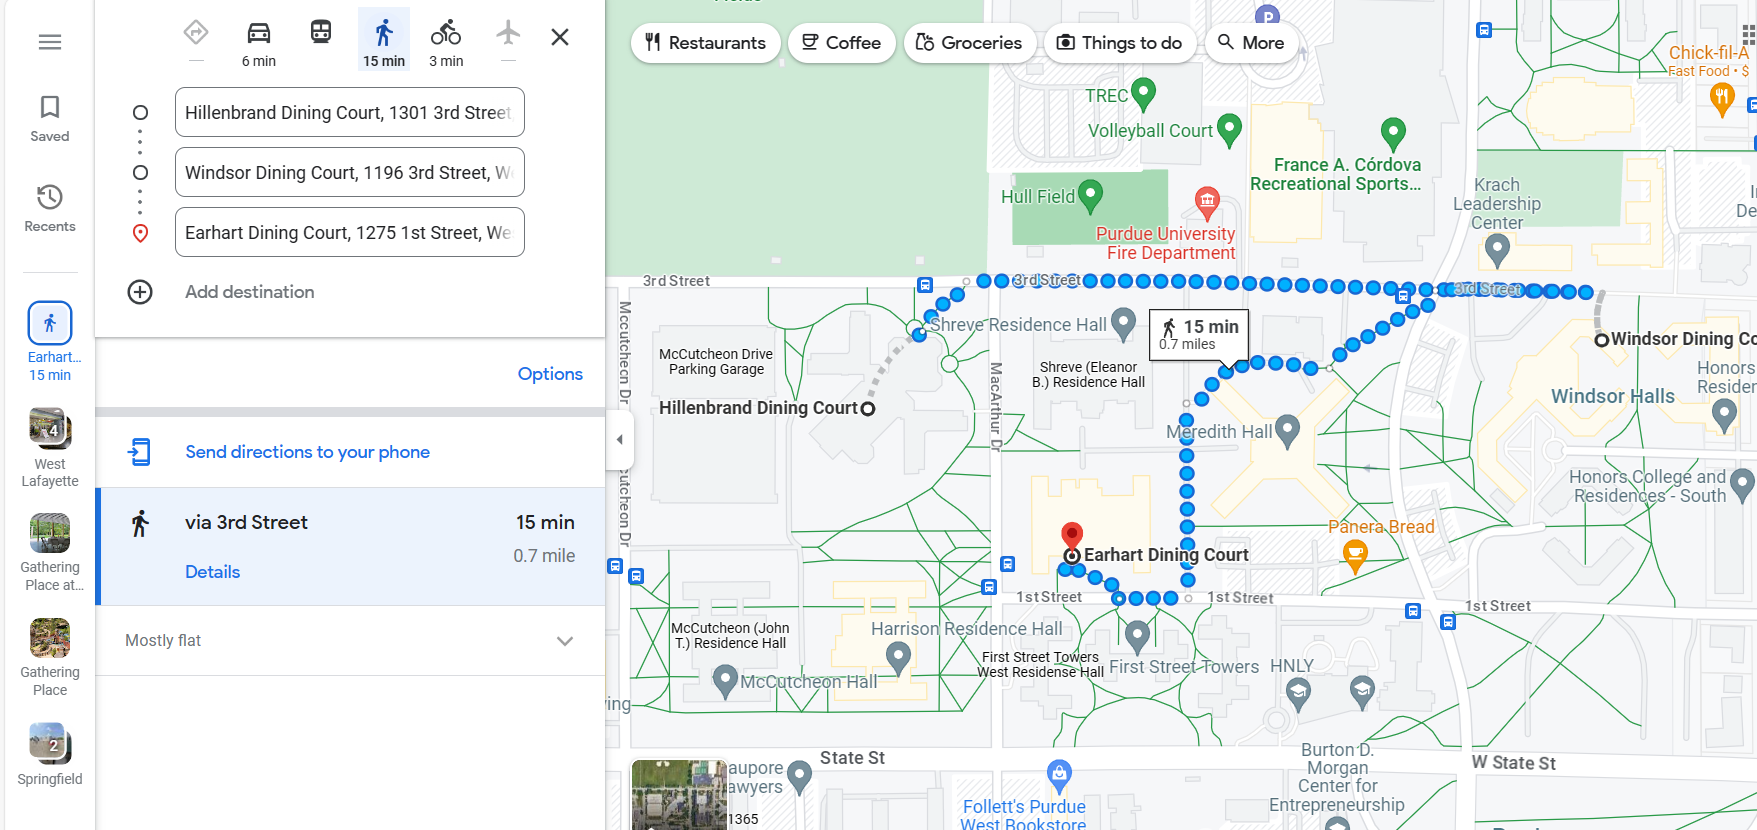

These places and this route is my recommendation. This is because these placease are very nearby and can be easily covered by walking. In addition, there are amny other food courrts in that reagion.

## Additional Information

1. With proper and seamless access to all multiple Google APIs and effeicient web crawler, we can extract data from various online data sources. This can further give us a different perspective on the same problem.

2. As discussed in the previous text boxes, we can perform optimization model.